#Instalasi liibrary yang diperlukan

In [1]:
!pip install requests beautifulsoup4 pandas matplotlib seaborn wordcloud

# Mengimpor library yang Diperlukan

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Menyediakan URL dan header

In [3]:
url = 'https://id.jobstreet.com/id/jobs/in-Magelang-Jawa-Tengah?sortmode=ListedDate'

In [4]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36 Edg/139.0.3405.102"
}

# Mengirim Permintaan HTTP

In [5]:
s = requests.session()
s.headers.update(headers)

page = s.get(url)

# Memeriksa status permintaan (Request Status)

In [6]:
if page.status_code == 200:
    print("Request berhasil!")
else:
    print(f"Request gagal dengan kode status: {page.status_code}")

Request berhasil!


# Memproses HTML dengan BeautifulSoup

In [7]:
soup = BeautifulSoup(page.text, 'lxml')
joblist = soup.find('div', class_='_1lns5ab0 _6c7qzn5g _6c7qzn5c _6c7qznhk _6c7qzn9s _6c7qzn9t _6c7qzn9m')

In [ ]:
# print(joblist.prettify())

# Mengambil data dari setiap pekerjaan

In [9]:
jobs_data = []
for article in joblist.find_all('article', {'class': '_1lns5ab0 _1lns5ab1 _6c7qzn98 _6c7qzn8t _6c7qzn84 _6c7qzn7p _6c7qznbg _6c7qznb1 _6c7qznac _6c7qzn9x _6c7qzni _6c7qzn6c _6c7qzn5g _1gqsodfa _1gqsodf8 _1gqsodf9 od4ez810 od4ez813 _6c7qzn34 _6c7qzn37'}):
    position = article.find('div', {'class':'_1lns5ab0 _6c7qzn5i _6c7qzn54'})
    company = article.find(attrs={'data-automation': 'jobCompany'})
    location = article.find(attrs={'data-automation': 'jobLocation'})
    salary = article.find('span', {'class': '_1lns5ab0 c489xr2 _6c7qzn50 _6c7qzn0 _6c7qzns c489xr4'})
    time = article.find(attrs={'data-automation': 'jobListingDate'})

AttributeError: 'NoneType' object has no attribute 'find_all'

# Menangani elemen yang tidak ditemukan

In [ ]:
position_text = position.get_text() if position else "Position not found"
company_text = company.get_text() if company else "Company not found"
location_text = location.get_text() if location else "Location not found"
salary_text = salary.get_text() if salary else "Salary not found"
time_text = time.get_text() if time else "Time not found"

# Menyimpan data ke list

In [ ]:
jobs_data.append({
    'Position': position_text,
    'Company': company_text,
    'Location': location_text,
    'Salary': salary_text,
    'Time': time_text
})

# Kode lengkap pengambilan data

In [ ]:
jobs_data = []
for article in joblist.find_all('article', {'class': '_1lns5ab0 _1lns5ab1 _6c7qzn98 _6c7qzn8t _6c7qzn84 _6c7qzn7p _6c7qznbg _6c7qznb1 _6c7qznac _6c7qzn9x _6c7qzni _6c7qzn6c _6c7qzn5g _1gqsodfa _1gqsodf8 _1gqsodf9 od4ez810 od4ez813 _6c7qzn34 _6c7qzn37'}):
    position = article.find('div', {'class':'_1lns5ab0 _6c7qzn5i _6c7qzn54'})
    company = article.find(attrs={'data-automation': 'jobCompany'})
    location = article.find(attrs={'data-automation': 'jobLocation'})
    salary = article.find('span', {'class': '_1lns5ab0 c489xr2 _6c7qzn50 _6c7qzn0 _6c7qzns c489xr4'})
    time = article.find(attrs={'data-automation': 'jobListingDate'})

    position_text = position.get_text() if position else "Position not found"
    company_text = company.get_text() if company else "Company not found"
    location_text = location.get_text() if location else "Location not found"
    salary_text = salary.get_text() if salary else "Salary not found"
    time_text = time.get_text() if time else "Time not found"

    print(position_text)
    print(company_text)
    print(location_text)
    print(salary_text)
    print(time_text)
    print("====================================================")

    jobs_data.append({
        'Position': position_text,
        'Company': company_text,
        'Location': location_text,
        'Salary': salary_text,
        'Time': time_text
    })

Sales Marketing
BUDI UTAMA
Ngaglik
Rp 2.400.000 – Rp 2.700.000 per month
10 menit yang lalu
Estimator
mitrabangun.id
Kabupaten Semarang
Rp 4.000.000 – Rp 5.000.000 per month
18 menit yang lalu
Admin Executive
Beautica Digital Dafhina
Yogyakarta
Salary not found
21 menit yang lalu
Sales Promotor (SPB/SPG) Yogyakarta
PT. JAYA BERSAMA  SAPUTRA PERKASA
Sleman
Rp 2.000.000 – Rp 3.000.000 per month
27 menit yang lalu
Manager HRGA
PT Marel Sukses Pratamaa
Sleman
Rp 4,500,000 – Rp 5,000,000 per month
29 menit yang lalu
Staf QA Document Control
PT. Aleyah Sintasint Farma
Kulon Progo
Rp 3.000.000 – Rp 3.200.000 per month
38 menit yang lalu
Executive Assistant
Beautica Digital Dafhina
Yogyakarta
Rp 3.000.000 – Rp 4.500.000 per month
53 menit yang lalu
Inventory Accounting
PT Ameya Livingstyle Indonesia
Kabupaten Bantul
Salary not found
1 jam yang lalu
Finance Leader
Futake Indonesia
Klaten
Salary not found
1 jam yang lalu
Compliance Officer
Pengiklan Anonim
Jawa Tengah
Salary not found
1 jam yang

# Menyimpan data dalam format CSV

In [ ]:
df_jobs = pd.DataFrame(jobs_data)
df_jobs.to_csv('[Jobstreet]Data_Job_Listings.csv', index=False)

In [ ]:
df_jobs.head()

,Position,Company,Location,Salary,Time
0,Sales Marketing,BUDI UTAMA,Ngaglik,Rp 2.400.000 – Rp 2.700.000 per month,10 menit yang lalu
1,Estimator,mitrabangun.id,Kabupaten Semarang,Rp 4.000.000 – Rp 5.000.000 per month,18 menit yang lalu
2,Admin Executive,Beautica Digital Dafhina,Yogyakarta,Salary not found,21 menit yang lalu
3,Sales Promotor (SPB/SPG) Yogyakarta,PT. JAYA BERSAMA SAPUTRA PERKASA,Sleman,Rp 2.000.000 – Rp 3.000.000 per month,27 menit yang lalu
4,Manager HRGA,PT Marel Sukses Pratamaa,Sleman,"Rp 4,500,000 – Rp 5,000,000 per month",29 menit yang lalu


In [ ]:
df_jobs.shape

(32, 5)

# Scraping beberapa halaman

In [ ]:
jobs_data = []

for i in range(1,86):
  url = f'https://id.jobstreet.com/id/jobs/in-Magelang-Jawa-Tengah?page={i}&sortmode=ListedDate'

  headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36 Edg/139.0.3405.102"
  }

  s = requests.session()
  s.headers.update(headers)

  try:
    page = s.get(url)
    soup = BeautifulSoup(page.text, 'lxml')
    joblist = soup.find('div', class_='_1lns5ab0 _6c7qzn5g _6c7qzn5c _6c7qznhk _6c7qzn9s _6c7qzn9t _6c7qzn9m')

    for article in joblist.find_all('article', {'class': '_1lns5ab0 _1lns5ab1 _6c7qzn98 _6c7qzn8t _6c7qzn84 _6c7qzn7p _6c7qznbg _6c7qznb1 _6c7qznac _6c7qzn9x _6c7qzni _6c7qzn6c _6c7qzn5g _1gqsodfa _1gqsodf8 _1gqsodf9 od4ez810 od4ez813 _6c7qzn34 _6c7qzn37'}):
      position = article.find('div', {'class':'_1lns5ab0 _6c7qzn5i _6c7qzn54'})
      company = article.find(attrs={'data-automation': 'jobCompany'})
      location = article.find(attrs={'data-automation': 'jobLocation'})
      salary = article.find('span', {'class': '_1lns5ab0 c489xr2 _6c7qzn50 _6c7qzn0 _6c7qzns c489xr4'})
      time = article.find(attrs={'data-automation': 'jobListingDate'})

      position_text = position.get_text() if position else "Position not found"
      company_text = company.get_text() if company else "Company not found"
      location_text = location.get_text() if location else "Location not found"
      salary_text = salary.get_text() if salary else "Salary not found"
      time_text = time.get_text() if time else "Time not found"

      print(position_text)
      print(company_text)
      print(location_text)
      print(salary_text)
      print(time_text)
      print("====================================================")

      jobs_data.append({
          'Position': position_text,
          'Company': company_text,
          'Location': location_text,
          'Salary': salary_text,
          'Time': time_text
      })
  except requests.exceptions.RequestException as e:
    print(f"Error: {e}")

Streaming output truncated to the last 5000 lines.
20 hari yang lalu
Digital Advertising Specialist
Travelingeropa group
Yogyakarta
Rp 3.500.000 – Rp 5.100.000 per month
20 hari yang lalu
Finance Supervisor
PT Formosa Bag Indonesia
Jawa Tengah
Salary not found
20 hari yang lalu
STAFF UTILITY
PT Ungaran Sari Garments
Ungaran
Salary not found
20 hari yang lalu
INDUSTRIAL ENGINEERING STAFF
PT Ungaran Sari Garments
Ungaran
Salary not found
20 hari yang lalu
Pramuniaga
CV. Aromatique Art
Yogyakarta
Salary not found
20 hari yang lalu
Sales B2B
Inaura
Yogyakarta
Salary not found
20 hari yang lalu
Waiter
Nakamura Holistic Therapy
Yogyakarta
Salary not found
20 hari yang lalu
SALES - Magelang
PT Jaya Fermex
Magelang
Salary not found
20 hari yang lalu
Marketing Export Import
PT Karya Mulia Logistic
Yogyakarta
Salary not found
20 hari yang lalu
Sales Modern Trade
PT.LESTARI ALAM
Ungaran
Salary not found
20 hari yang lalu
KURIR PAKET
PT Artha Kreasi Utama
Yogyakarta
Salary not found
20 hari yang l

In [ ]:
df_jobs = pd.DataFrame(jobs_data)
df_jobs.to_csv('[Jobstreet]Data_Job_Listings.csv', index=False)

In [ ]:
df_jobs.shape

(2695, 5)

# Case tidak tahu page number sampai halaman berapa

In [ ]:
jobs_data = []

# Memulai dari halaman 1
page_number = 1
while True:
  print(f"Scraping page {page_number}")

  # Membuat URL dengan page_number
  url = f'https://id.jobstreet.com/id/jobs/in-Magelang-Jawa-Tengah?page={page_number}&sortmode=ListedDate'

  # Mengirimkan request ke URL
  headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36 Edg/139.0.3405.102"
  }

  s = requests.session()
  s.headers.update(headers)

  try:
    # Mengambil halaman
    page = s.get(url)

    # Cek apakah request berhasil
    if page.status_code != 200:
      print(f"Request failed in page {page_number} with status code: {page.status_code}")
      break

    # Memparsing halaman dengan BeautifulSoup
    soup = BeautifulSoup(page.text, 'lxml')
    joblist = soup.find('div', class_='_1lns5ab0 _6c7qzn5g _6c7qzn5c _6c7qznhk _6c7qzn9s _6c7qzn9t _6c7qzn9m')


    # Menghentikan proses scraping jika tidak ada joblist di halaman
    if not joblist:
      print(f"There is no joblist in page {page_number}. Stop scraping data")
      break

    # Mengambil data pekerjaan dari setiap elemen article
    for article in joblist.find_all('article', {'class': '_1lns5ab0 _1lns5ab1 _6c7qzn98 _6c7qzn8t _6c7qzn84 _6c7qzn7p _6c7qznbg _6c7qznb1 _6c7qznac _6c7qzn9x _6c7qzni _6c7qzn6c _6c7qzn5g _1gqsodfa _1gqsodf8 _1gqsodf9 od4ez810 od4ez813 _6c7qzn34 _6c7qzn37'}):
      position = article.find('div', {'class':'_1lns5ab0 _6c7qzn5i _6c7qzn54'})
      company = article.find(attrs={'data-automation': 'jobCompany'})
      location = article.find(attrs={'data-automation': 'jobLocation'})
      salary = article.find('span', {'class': '_1lns5ab0 c489xr2 _6c7qzn50 _6c7qzn0 _6c7qzns c489xr4'})
      time = article.find(attrs={'data-automation': 'jobListingDate'})

      # Cek jika elemen ditemukan sebelum mengambil teks
      position_text = position.get_text() if position else "Position not found"
      company_text = company.get_text() if company else "Company not found"
      location_text = location.get_text() if location else "Location not found"
      salary_text = salary.get_text() if salary else "Salary not found"
      time_text = time.get_text() if time else "Time not found"

      print(position_text)
      print(company_text)
      print(location_text)
      print(salary_text)
      print(time_text)
      print("====================================================")

      jobs_data.append({
          'Position': position_text,
          'Company': company_text,
          'Location': location_text,
          'Salary': salary_text,
          'Time': time_text
      })

      # Cetak hasil dari halaman
      print(f"Success in page {page_number}")

      # Melanjutkan ke halaman berikutnya
      page_number += 1

  except requests.exceptions.RequestException as e:
    print(f"Error: {e}")
    break

# Data dibersihkan dengan Ms. Excel untuk Kemudian diklasifikasikan menggunakan Python

In [ ]:
df = pd.read_excel('Data_Job_Listings.xlsx')

# Pembuatan kamus KBLI untuk klasifikasi sektor di daftar pekerjaan

In [ ]:
kbli_map = {
    # A: Pertanian, Kehutanan dan Perikanan
    'A': ['pertanian', 'agrikultur', 'perkebunan', 'petani', 'kehutanan', 'hutan', 'perikanan', 'nelayan', 'tambak', 'agronomi', 'hortikultura'],

    # B: Pertambangan dan Penggalian
    'B': ['tambang', 'pertambangan', 'mining', 'geologi', 'geologist', 'pengeboran', 'drilling', 'eksplorasi'],

    # C: Industri Pengolahan
    'C': ['industri', 'pabrik', 'manufaktur', 'produksi', 'operator', 'qc', 'qaqc', 'quality control', 'foreman', 'supervisor produksi'],

    # D: Pengadaan Listrik, Gas, Uap/Air Panas Dan Udara Dingin
    'D': ['listrik', 'pln', 'kelistrikan', 'energi', 'pembangkit', 'power plant', 'gas', 'pgn'],

    # E: Treatment Air, Sampah, dll.
    'E': ['air bersih', 'pdam', 'limbah', 'waste management', 'sampah', 'daur ulang', 'recycling', 'remediasi'],

    # F: Konstruksi
    'F': ['konstruksi', 'sipil', 'civil', 'arsitek', 'architect', 'proyek', 'estimator', 'drafter', 'surveyor', 'teknisi ac'],

    # G: Perdagangan & Reparasi
    'G': ['sales', 'marketing', 'kasir', 'cmo', 'promotor', 'spg', 'spb', 'store', 'toko', 'retail', 'eceran', 'grosir', 'distributor', 'merchandiser', 'bengkel', 'mekanik'],

    # H: Pengangkutan dan Pergudangan
    'H': ['transportasi', 'logistik', 'gudang', 'warehouse', 'sopir', 'driver', 'kurir', 'ekspedisi', 'supply chain'],

    # I: Akomodasi & Makan Minum
    'I': ['hotel', 'resto', 'restoran', 'kafe', 'barista', 'cook', 'koki', 'chef', 'baker', 'waiter', 'waitress', 'f&b', 'daily worker', 'kitchen', 'purchasing'],

    # J: Informasi Dan Komunikasi
    'J': ['it', 'informasi', 'komunikasi', 'software', 'developer', 'programmer', 'backend', 'frontend', 'ui ux', 'designer', 'content', 'videografer', 'data entry', 'telekomunikasi', 'jaringan', 'network'],

    # K: Keuangan dan Asuransi
    'K': ['keuangan', 'finance', 'akuntansi', 'accounting', 'pajak', 'tax', 'bank', 'bpr', 'asuransi', 'insurance', 'kredit', 'analis', 'lippo'],

    # L: Real Estat
    'L': ['real estat', 'properti', 'apartemen', 'agen properti', 'broker'],

    # M: Aktivitas Profesional, Ilmiah Dan Teknis
    'M': ['profesional', 'ilmiah', 'teknis', 'hukum', 'legal', 'konsultan', 'consultant', 'riset', 'penelitian', 'admin', 'administrasi', 'executive assistant', 'compliance'],

    # N: Aktivitas Penyewaan, Ketenagakerjaan, Agen Perjalanan, dll.
    'N': ['sewa', 'rental', 'hrd', 'sdm', 'human resource', 'recruitment', 'ga', 'general affair', 'agen perjalanan', 'travel', 'tour', 'penunjang usaha'],

    # O: Administrasi Pemerintahan, Pertahanan Dan Jaminan Sosial Wajib
    'O': ['pemerintahan', 'pns', 'asn', 'tni', 'polri', 'pertahanan', 'dinas', 'kementerian', 'bumn'],

    # P: Pendidikan
    'P': ['pendidikan', 'guru', 'dosen', 'pengajar', 'tutor', 'sekolah', 'universitas', 'kursus', 'pelatihan'],

    # Q: Aktivitas Kesehatan Manusia Dan Aktivitas Sosial
    'Q': ['kesehatan', 'dokter', 'perawat', 'bidan', 'apoteker', 'farmasi', 'klinik', 'rumah sakit', 'sosial', 'panti'],

    # R: Kesenian, Hiburan Dan Rekreasi
    'R': ['seni', 'seniman', 'musisi', 'hiburan', 'event organizer', 'eo', 'rekreasi', 'taman hiburan', 'bioskop'],

    # T: Aktivitas Rumah Tangga...
    'T': ['art', 'asisten rumah tangga', 'pembantu', 'sopir pribadi'],

    # U: Aktivitas Badan Internasional...
    'U': ['pbb', 'unicef', 'who', 'ngo internasional']
}

# Fungsi untuk mengklasifikasikan posisi berdasarkan kamus di atas
def klasifikasi_kbli(posisi):
    posisi_lower = str(posisi).lower()
    for kategori, keywords in kbli_map.items():
        if any(keyword in posisi_lower for keyword in keywords):
            return kategori
    # Jika tidak ada kata kunci yang cocok, masukkan ke Kategori S (Aktivitas Jasa Lainnya)
    return 'S'

# Buat kolom baru 'KBLI' di DataFrame Anda
df['KBLI'] = df['Position'].apply(klasifikasi_kbli)

print("Kamus KBLI komprehensif berhasil dibuat.")
print("Contoh hasil klasifikasi KBLI:")
print(df[['Position', 'KBLI']].head())

Kamus KBLI komprehensif berhasil dibuat.
Contoh hasil klasifikasi KBLI:
                              Position KBLI
0                      Sales Marketing    G
1                            Estimator    F
2                      Admin Executive    M
3  Sales Promotor (Spb/Spg) Yogyakarta    G
4                         Manager Hrga    N


# Mengetahui sektor yang paling banyak membuka lowongan pekerjaan berdasarkan KBLI dari BPS

/tmp/ipython-input-1971023123.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=sektor_counts.values, y=sektor_counts.index, palette='viridis', orient='h')


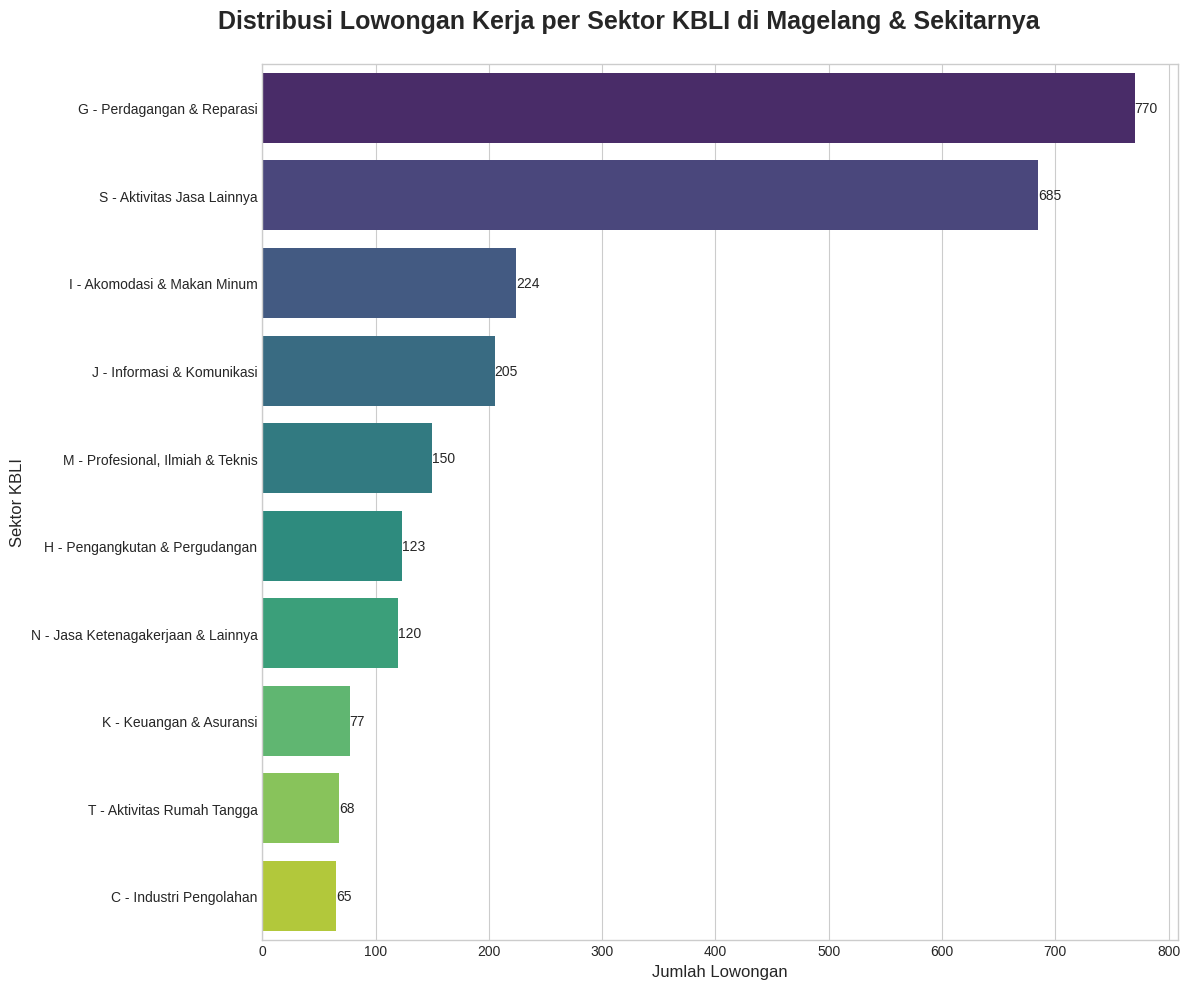


--- Data Frekuensi Lowongan per Sektor KBLI ---
KBLI
G - Perdagangan & Reparasi            770
S - Aktivitas Jasa Lainnya            685
I - Akomodasi & Makan Minum           224
J - Informasi & Komunikasi            205
M - Profesional, Ilmiah & Teknis      150
H - Pengangkutan & Pergudangan        123
N - Jasa Ketenagakerjaan & Lainnya    120
K - Keuangan & Asuransi                77
T - Aktivitas Rumah Tangga             68
C - Industri Pengolahan                65
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah lowongan per kategori KBLI
top_n = 10
sektor_counts = df['KBLI'].value_counts().head(top_n)

# Definisikan nama lengkap KBLI untuk label grafik yang lebih informatif
nama_kbli_lengkap = {
    'A': 'A - Pertanian, Kehutanan & Perikanan',
    'B': 'B - Pertambangan & Penggalian',
    'C': 'C - Industri Pengolahan',
    'D': 'D - Pengadaan Listrik & Gas',
    'E': 'E - Treatment Air & Sampah',
    'F': 'F - Konstruksi',
    'G': 'G - Perdagangan & Reparasi',
    'H': 'H - Pengangkutan & Pergudangan',
    'I': 'I - Akomodasi & Makan Minum',
    'J': 'J - Informasi & Komunikasi',
    'K': 'K - Keuangan & Asuransi',
    'L': 'L - Real Estat',
    'M': 'M - Profesional, Ilmiah & Teknis',
    'N': 'N - Jasa Ketenagakerjaan & Lainnya',
    'O': 'O - Administrasi Pemerintahan',
    'P': 'P - Pendidikan',
    'Q': 'Q - Kesehatan & Sosial',
    'R': 'R - Kesenian & Hiburan',
    'S': 'S - Aktivitas Jasa Lainnya',
    'T': 'T - Aktivitas Rumah Tangga',
    'U': 'U - Aktivitas Badan Internasional'
}
# Petakan kode KBLI ke nama lengkapnya
sektor_counts.index = sektor_counts.index.map(nama_kbli_lengkap).fillna('Lainnya')

# --- Visualisasi Data ---
plt.style.use('seaborn-v0_8-whitegrid') # Menggunakan style agar grafik terlihat bagus
plt.figure(figsize=(12, 10)) # Ukuran grafik agar tidak terlalu sempit

# Membuat bar plot horizontal
barplot = sns.barplot(x=sektor_counts.values, y=sektor_counts.index, palette='viridis', orient='h')

plt.title('Distribusi Lowongan Kerja per Sektor KBLI di Magelang & Sekitarnya\n', fontsize=18, fontweight='bold', x=0.4)
plt.xlabel('Jumlah Lowongan', fontsize=12)
plt.ylabel('Sektor KBLI', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Menambahkan label angka di ujung setiap batang untuk kejelasan
for index, value in enumerate(sektor_counts.values):
    plt.text(value + 0.1, index, str(value), va='center', fontsize=10, fontweight='medium')

# Merapikan layout
plt.tight_layout()
plt.show()

# Menampilkan data mentahnya dalam bentuk tabel
print("\n--- Data Frekuensi Lowongan per Sektor KBLI ---")
print(sektor_counts)


In [ ]:
sektor_counts

,count
KBLI,
G - Perdagangan & Reparasi,770
S - Aktivitas Jasa Lainnya,685
I - Akomodasi & Makan Minum,224
J - Informasi & Komunikasi,205
"M - Profesional, Ilmiah & Teknis",150
H - Pengangkutan & Pergudangan,123
N - Jasa Ketenagakerjaan & Lainnya,120
K - Keuangan & Asuransi,77
T - Aktivitas Rumah Tangga,68


# Mengetahui posisi pekerjaan yang paling banyak membuka lowongan pekerjaan berdasarkan KBLI dari BPS

/tmp/ipython-input-4235549153.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=posisi_counts.values, y=posisi_counts.index, palette='plasma', orient='h')


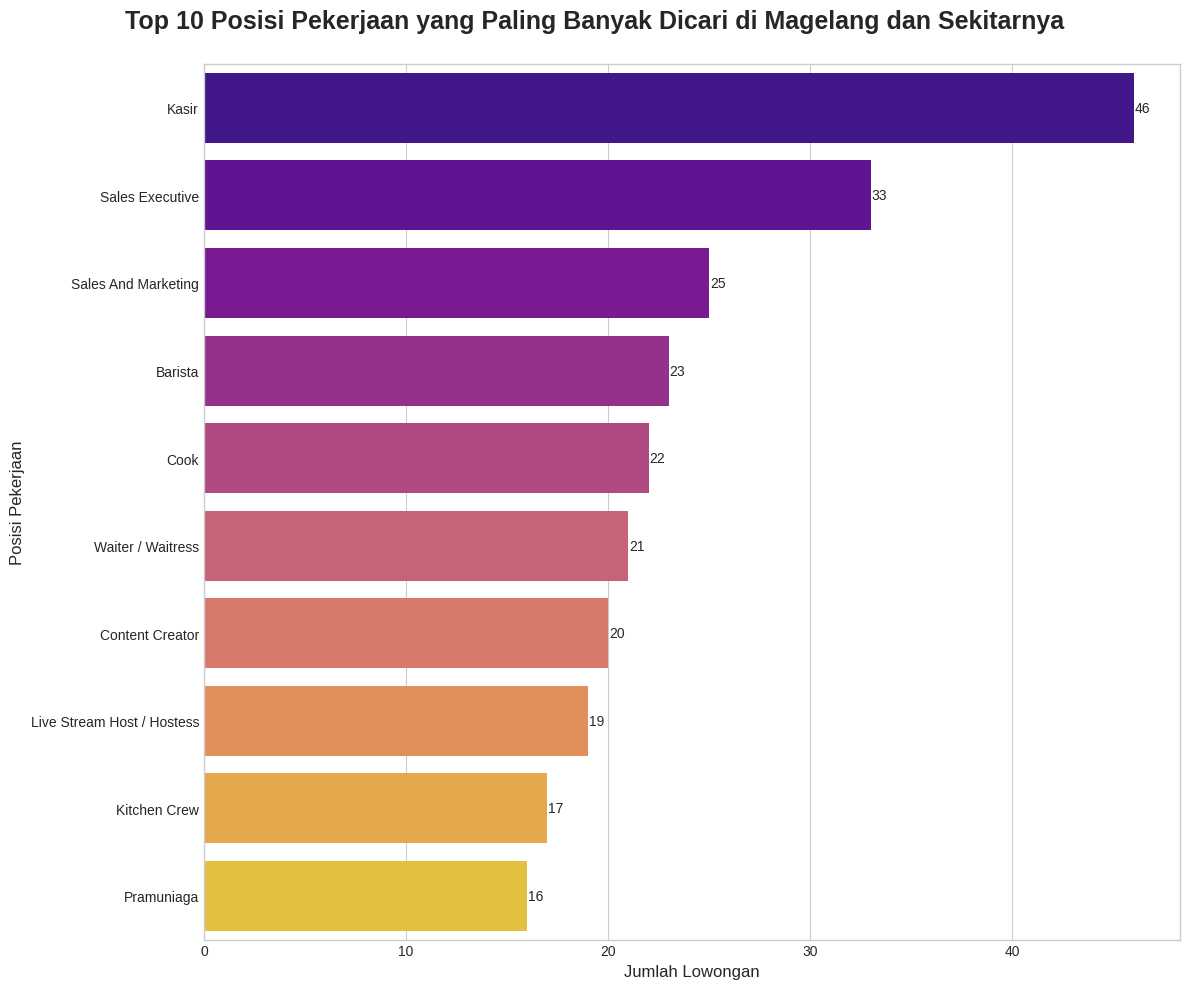


--- Data Frekuensi Top 10 Posisi Pekerjaan ---
Position
Kasir                         46
Sales Executive               33
Sales And Marketing           25
Barista                       23
Cook                          22
Waiter / Waitress             21
Content Creator               20
Live Stream Host / Hostess    19
Kitchen Crew                  17
Pramuniaga                    16
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung 10 posisi pekerjaan yang paling sering muncul
top_n = 10
posisi_counts = df['Position'].value_counts().head(top_n)

# --- Visualisasi Data ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 10))

# Membuat bar plot horizontal
barplot = sns.barplot(x=posisi_counts.values, y=posisi_counts.index, palette='plasma', orient='h')

plt.title(f'Top {top_n} Posisi Pekerjaan yang Paling Banyak Dicari di Magelang dan Sekitarnya\n', fontsize=18, fontweight='bold', x=0.4)
plt.xlabel('Jumlah Lowongan', fontsize=12)
plt.ylabel('Posisi Pekerjaan', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Menambahkan label angka di ujung setiap batang
for index, value in enumerate(posisi_counts.values):
    plt.text(value + 0.05, index, str(value), va='center', fontsize=10, fontweight='medium')

# Balik urutan sumbu y agar yang paling banyak muncul ada di atas
plt.tight_layout()
plt.show()

# Menampilkan data mentahnya dalam bentuk tabel
print(f"\n--- Data Frekuensi Top {top_n} Posisi Pekerjaan ---")
print(posisi_counts)

In [ ]:
# Ganti df dengan nama DataFrame Anda
posisi_counts = df['Position'].value_counts()

# .reset_index() akan membuat dua kolom: 'index' (posisi) dan 'Position' (jumlah)
df_counts = posisi_counts.reset_index()

# Ubah nama kolom agar lebih jelas
df_counts.columns = ['Posisi', 'Jumlah Lowongan']

# index=False agar nomor baris dari DataFrame tidak ikut disimpan
nama_file_output = 'frekuensi_posisi_pekerjaan.xlsx'
df_counts.to_excel(nama_file_output, index=False)

print(f"Output berhasil disimpan ke file: {nama_file_output}")

Output berhasil disimpan ke file: frekuensi_posisi_pekerjaan.xlsx


# Mengetahui sektor paling berkontribusi terhadap PDRB Kota Magelang

--- Data PDRB dari file cleaned setelah diurutkan ---


,Sektor,PDRB_2024
0,Industri Pengolahan,1950.02
1,Konstruksi,1883.49
2,Perdagangan Besar dan Eceran; Reparasi Mobil d...,1652.24
3,"Administrasi Pemerintahan, Pertahanan dan Jami...",1203.50
4,Transportasi dan Pergudangan,942.74
5,Jasa Pendidikan,875.35
6,Penyediaan Akomodasi dan Makan Minum,776.53
7,Informasi dan Komunikasi,695.04
8,Jasa Keuangan dan Asuransi,582.38
9,Jasa Kesehatan dan Kegiatan Sosial,370.71



Total PDRB yang terdeteksi dari file cleaned: 11821.94


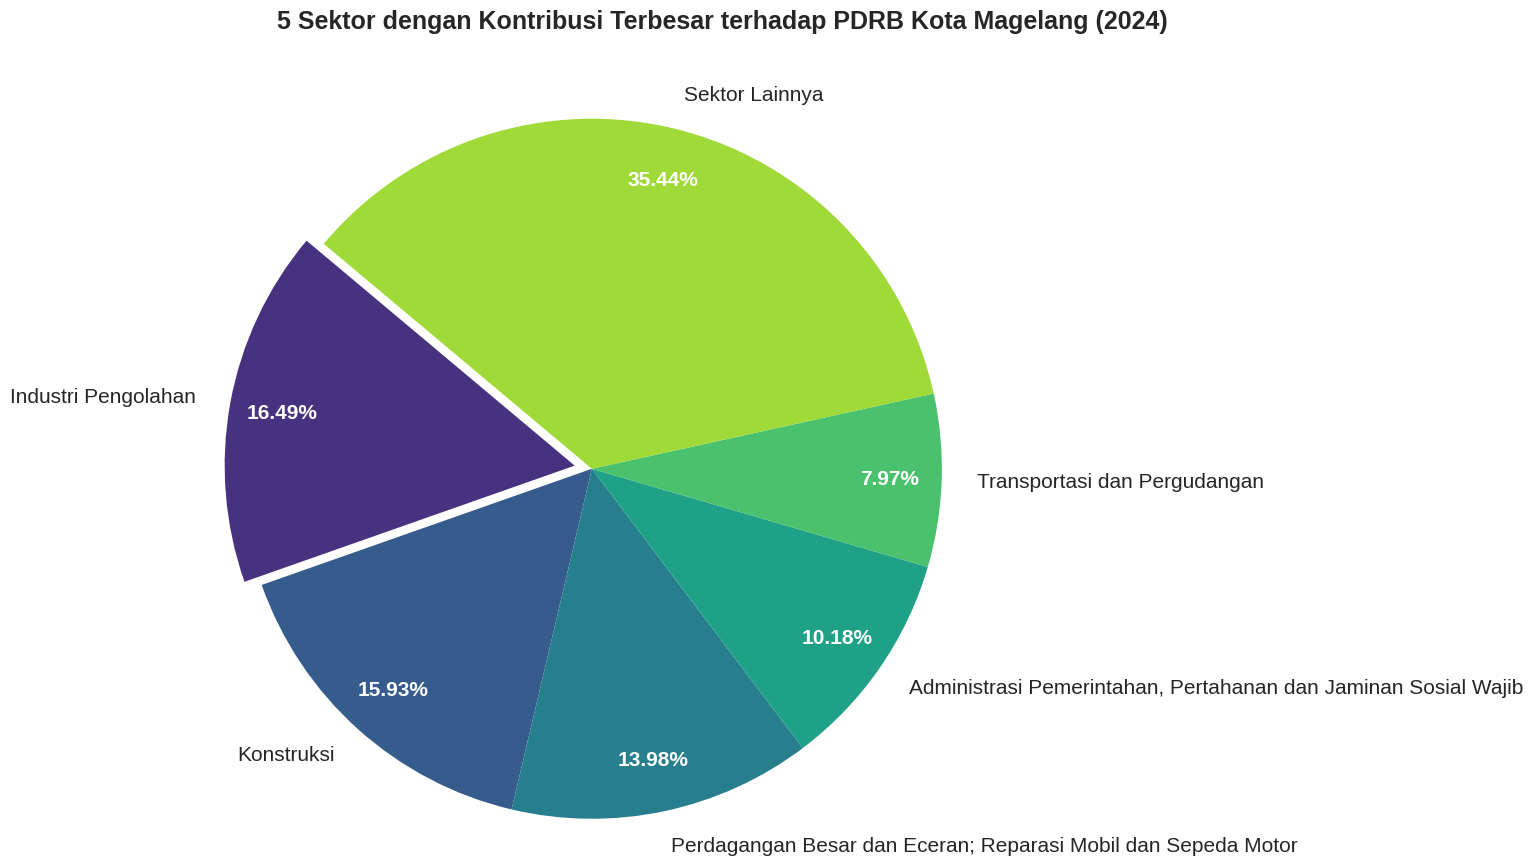

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

nama_file_cleaned = '/content/PDRB menurut Lapangan Kerja_cleaned.xlsx'

try:
    # Membaca file Excel yang sudah dibersihkan
    # Asumsikan file cleaned ini sudah dalam format yang siap digunakan
    df_cleaned = pd.read_excel(nama_file_cleaned)

    # Memilih kolom yang relevan: Sektor dan data tahun terakhir (sesuaikan nama kolom jika berbeda)
    # Berdasarkan file cleaned, kolom yang relevan mungkin sudah bernama 'Sektor' dan '2024'
    # Sesuaikan nama kolom '2024' jika di file cleaned namanya berbeda
    df_pdrb_cleaned = df_cleaned[['Sektor', 2024]].copy()
    df_pdrb_cleaned.columns = ['Sektor', 'PDRB_2024'] # Pastikan nama kolom konsisten

    # Menghapus baris kosong jika masih ada
    df_pdrb_cleaned = df_pdrb_cleaned.dropna(subset=['Sektor', 'PDRB_2024'])

    # Mengubah kolom PDRB menjadi tipe data angka (numerik)
    df_pdrb_cleaned['PDRB_2024'] = pd.to_numeric(df_pdrb_cleaned['PDRB_2024'], errors='coerce')

    # Menghapus baris dengan nilai PDRB_2024 yang NaN setelah konversi
    df_pdrb_cleaned = df_pdrb_cleaned.dropna(subset=['PDRB_2024'])

    # Mengurutkan data dari yang terbesar ke terkecil
    df_pdrb_cleaned = df_pdrb_cleaned.sort_values(by='PDRB_2024', ascending=False).reset_index(drop=True)

    print("--- Data PDRB dari file cleaned setelah diurutkan ---")
    display(df_pdrb_cleaned)

    # Menghitung dan menampilkan total PDRB
    total_pdrb_cleaned = df_pdrb_cleaned['PDRB_2024'].sum()
    print(f"\nTotal PDRB yang terdeteksi dari file cleaned: {total_pdrb_cleaned:.2f}")


    # --- 2. MEMPROSES DATA UNTUK VISUALISASI (TOP 5 + Others) ---

    # Mengambil 5 sektor teratas
    top_5_cleaned = df_pdrb_cleaned.head(5)

    # Menghitung total PDRB dari sektor-sektor lainnya
    sum_others_cleaned = df_pdrb_cleaned.iloc[5:]['PDRB_2024'].sum()

    # Membuat DataFrame baru untuk 'Sektor Lainnya'
    others_df_cleaned = pd.DataFrame([{'Sektor': 'Sektor Lainnya', 'PDRB_2024': sum_others_cleaned}])

    # Menggabungkan 5 sektor teratas dengan 'Sektor Lainnya'
    pie_data_cleaned = pd.concat([top_5_cleaned, others_df_cleaned], ignore_index=True)

    # --- 3. MEMBUAT VISUALISASI PIE CHART ---

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 10))

    # Membuat palet warna yang menarik
    colors_cleaned = sns.color_palette('viridis', len(pie_data_cleaned))

    # Membuat 'explode' untuk menonjolkan sektor terbesar
    explode_cleaned = [0.05] + [0] * (len(pie_data_cleaned) - 1)

    # Membuat pie chart
    wedges, texts, autotexts = plt.pie(
        pie_data_cleaned['PDRB_2024'],
        labels=pie_data_cleaned['Sektor'],
        autopct='%1.2f%%',  # Mengubah format menjadi dua angka desimal
        startangle=140,
        colors=colors_cleaned,
        explode=explode_cleaned,
        pctdistance=0.85, # Jarak persentase dari pusat
        textprops={'fontsize': 15}
    )

    # Mengatur properti teks agar lebih mudah dibaca
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    # Menambahkan judul
    plt.title(
        '5 Sektor dengan Kontribusi Terbesar terhadap PDRB Kota Magelang (2024)\n',
        fontsize=18,
        fontweight='bold',
        pad=20,
        x=0.65 # Menyesuaikan posisi judul
    )

    # Memastikan pie chart berbentuk lingkaran sempurna
    plt.axis('equal')

    plt.show()

except FileNotFoundError:
    print(f"Error: File '{nama_file_cleaned}' tidak ditemukan. Pastikan Anda sudah mengunggah file ke Google Colab.")
except Exception as e:
    print(f"Terjadi error: {e}")

# Mengetahui trend persentase pengangguran di Kota Magelang

--- Data setelah di-pivot ---
Tingkat Pendidikan  Pendidikan Dasar ke bawah  Pendidikan Menengah  \
Tahun                                                                
2019                                     2.19                 3.19   
2020                                     3.92                 7.60   
2021                                     5.77                 6.28   
2022                                     4.53                 4.64   
2023                                     2.41                 5.94   

Tingkat Pendidikan  Pendidikan Tinggi  
Tahun                                  
2019                             2.84  
2020                             5.54  
2021                             5.03  
2022                             4.28  
2023                             7.77  


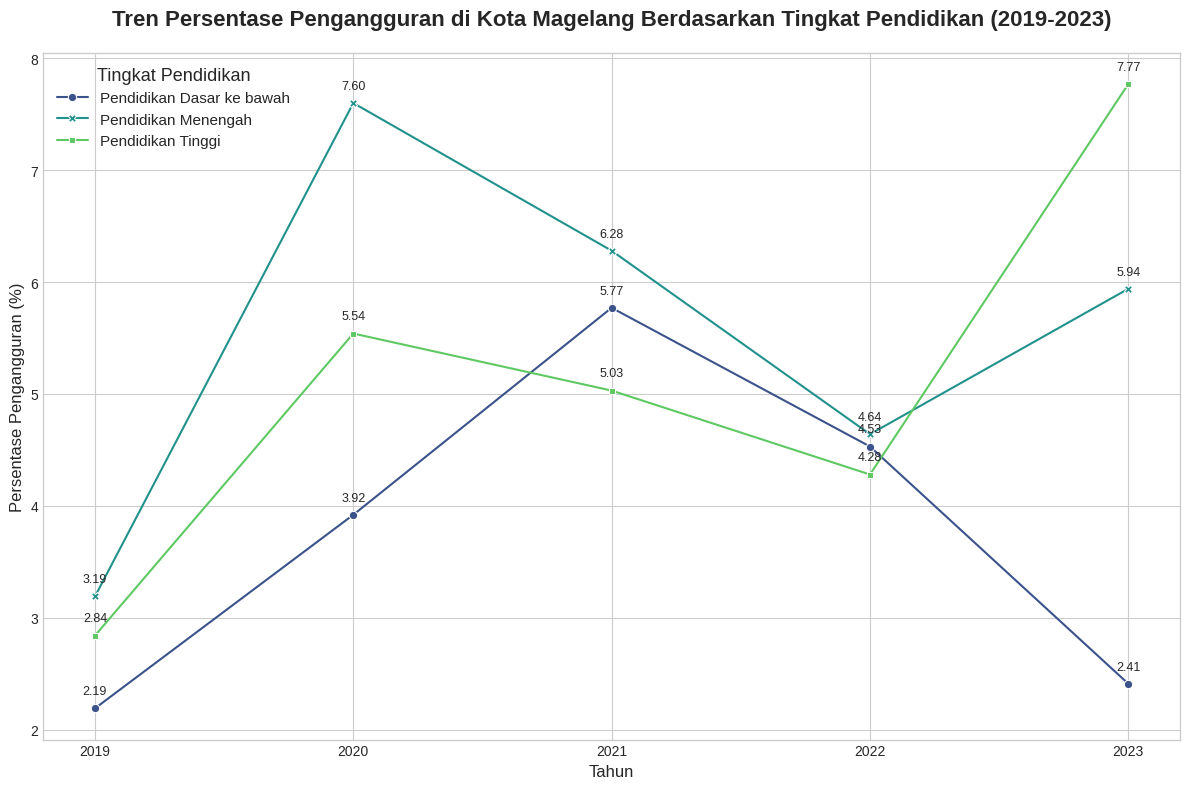

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# --- 1. MEMBUAT DATAFRAME DARI DATA ANDA ---
# Data telah dikoreksi sesuai gambar terbaru yang Anda berikan.
csv_data = """Tahun,Tingkat Pendidikan,Persentase Pengangguran
2023,Pendidikan Dasar ke bawah,2.41
2023,Pendidikan Menengah,5.94
2023,Pendidikan Tinggi,7.77
2022,Pendidikan Dasar ke bawah,4.53
2022,Pendidikan Menengah,4.64
2022,Pendidikan Tinggi,4.28
2021,Pendidikan Dasar ke bawah,5.77
2021,Pendidikan Menengah,6.28
2021,Pendidikan Tinggi,5.03
2020,Pendidikan Dasar ke bawah,3.92
2020,Pendidikan Menengah,7.60
2020,Pendidikan Tinggi,5.54
2019,Pendidikan Dasar ke bawah,2.19
2019,Pendidikan Menengah,3.19
2019,Pendidikan Tinggi,2.84
"""

# Membaca data string seolah-olah itu adalah file CSV
df = pd.read_csv(io.StringIO(csv_data))

# Mengganti koma (,) dengan titik (.) sebagai pemisah desimal dan mengubah ke tipe numerik
df['Persentase Pengangguran'] = df['Persentase Pengangguran'].astype(float)


# --- 2. MENGUBAH STRUKTUR DATA (PIVOT) ---
# Kita perlu mengubah format data agar setiap tingkat pendidikan menjadi kolom tersendiri.
df_pivot = df.pivot(index='Tahun', columns='Tingkat Pendidikan', values='Persentase Pengangguran')

# Mengurutkan tahun dari yang terlama ke terbaru
df_pivot = df_pivot.sort_index()

print("--- Data setelah di-pivot ---")
print(df_pivot)


# --- 3. MEMBUAT VISUALISASI LINE CHART ---

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# Membuat line chart menggunakan Seaborn untuk tampilan yang lebih menarik
sns.lineplot(data=df_pivot, markers=True, dashes=False, palette='viridis')

# Menambahkan judul dan label
plt.title(
    'Tren Persentase Pengangguran di Kota Magelang Berdasarkan Tingkat Pendidikan (2019-2023)',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Persentase Pengangguran (%)', fontsize=12)
plt.legend(title='Tingkat Pendidikan', title_fontsize='13', fontsize='11')

# Mengatur agar sumbu X hanya menampilkan tahun dalam format integer
plt.xticks(df_pivot.index)
plt.yticks(fontsize=10)

# Menambahkan anotasi/label angka di setiap titik data
for pendidikan in df_pivot.columns:
    for tahun, persentase in df_pivot[pendidikan].items():
        plt.text(tahun, persentase + 0.1, f'{persentase:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()